<a href="https://colab.research.google.com/github/Aditi49-hue/Aditi-Kocharekar/blob/main/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/zomato.csv')



In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df.drop('Unnamed: 0.1',axis=1, inplace=True)

In [ ]:
df.head()


,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,Cost_Bin,Profit_Estimate
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur,"(34.04, 1232.0]",23.8
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR,"(34.04, 1232.0]",187.2
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road,"(34.04, 1232.0]",136.9
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli,"(34.04, 1232.0]",364.5
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur,"(34.04, 1232.0]",112.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,False,False,False,False,False,False,False,False,False,False,False,False
7101,False,False,False,False,False,False,False,False,False,False,False,False
7102,False,False,False,False,False,False,False,False,False,False,False,False
7103,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['cuisines type'].fillna('Others', inplace=True)
df['avg cost (two people)'].fillna(df['avg cost (two people)'].median(), inplace=True)
df['rate (out of 5)'].fillna(df['rate (out of 5)'].mean(), inplace=True)

/tmp/ipython-input-1411431138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisines type'].fillna('Others', inplace=True)
/tmp/ipython-input-1411431138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
top_cuisinestype = df['cuisines type'].value_counts().head(10)
print(top_cuisinestype)


cuisines type
North Indian, Chinese                  421
North Indian                           420
South Indian                           348
Fast Food                              140
South Indian, North Indian, Chinese    128
Biryani                                122
Bakery, Desserts                        97
Desserts                                87
Cafe                                    85
Bakery                                  77
Name: count, dtype: int64


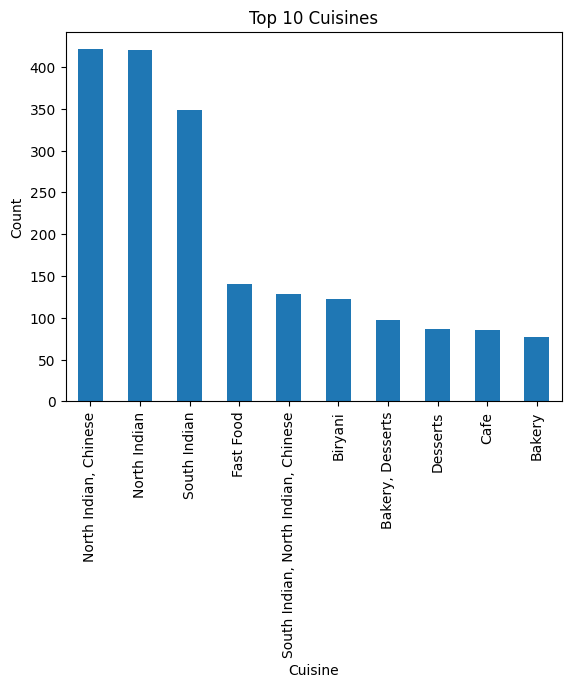

In [ ]:
plt.figure()
top_cuisinestype.plot(kind='bar')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

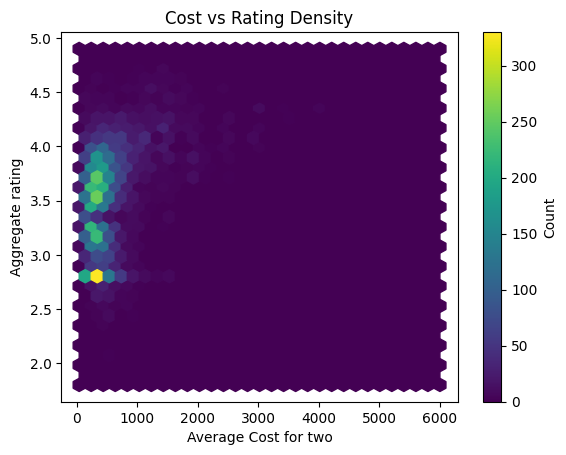

In [ ]:
plt.figure()
plt.hexbin(df['avg cost (two people)'], df['rate (out of 5)'], gridsize=30)
plt.colorbar(label='Count')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate rating')
plt.title('Cost vs Rating Density')
plt.show()

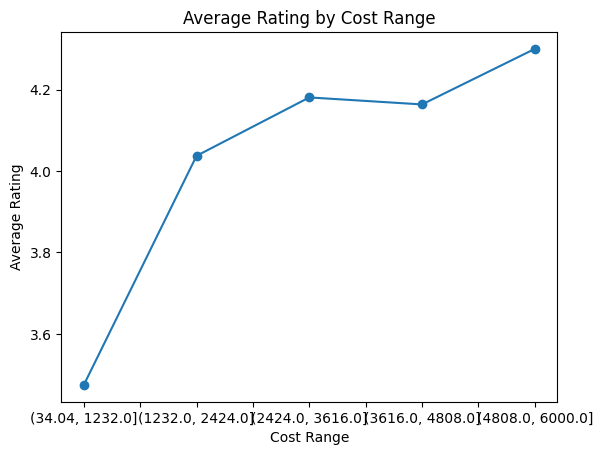

In [ ]:
plt.figure()
avg_rating.plot(kind='line', marker='o')
plt.title('Average Rating by Cost Range')
plt.xlabel('Cost Range')
plt.ylabel('Average Rating')
plt.show()

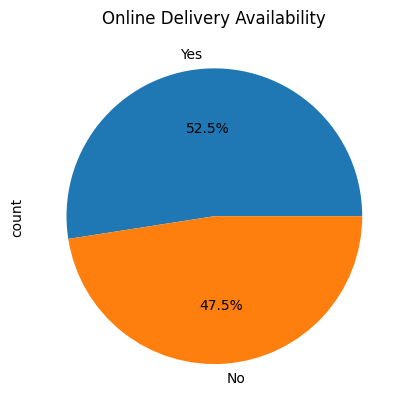

In [ ]:
online_delivery = df['online_order'].value_counts()

plt.figure()
online_delivery.plot(kind='pie', autopct='%1.1f%%')
plt.title('Online Delivery Availability')
plt.show()

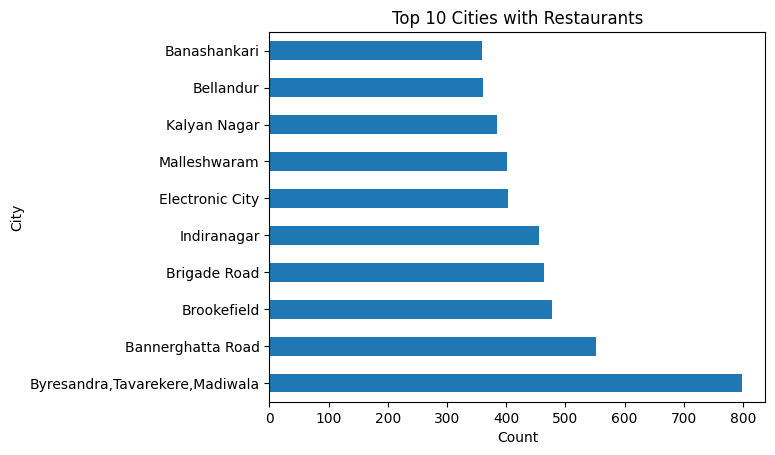

In [ ]:
top_cities = df['area'].value_counts().head(10)

plt.figure()
top_cities.plot(kind='barh')
plt.title('Top 10 Cities with Restaurants')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

In [ ]:
df['Profit_Estimate'] = df['rate (out of 5)'] * df['num of ratings']

In [ ]:
top_profit_restaurants = df[['restaurant name', 'Profit_Estimate']].sort_values(
    by='Profit_Estimate', ascending=False).head(10)

print(top_profit_restaurants)

                  restaurant name  Profit_Estimate
1035  Byg Brewski Brewing Company          80090.5
6665                         Toit          70293.2
6242              The Black Pearl          48941.1
770                   Big Pitcher          42651.2
423         Arbor Brewing Company          37687.5
4808               Prost Brew Pub          35343.0
2149                     Flechazo          33623.8
6380    The Hole in the Wall Cafe          32719.8
1489         Church Street Social          32439.2
757                    Biergarten          32265.5


/tmp/ipython-input-3993414533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


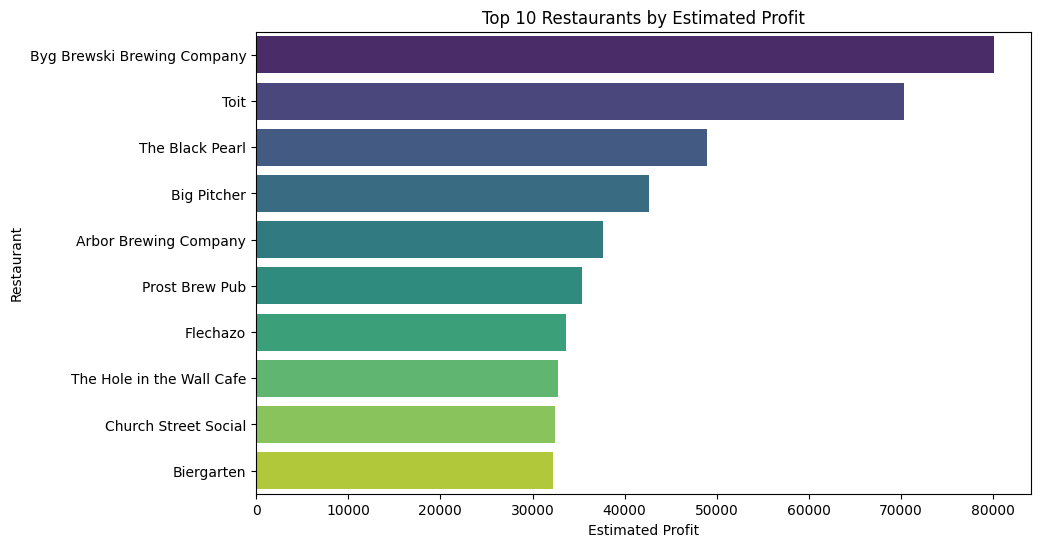

In [ ]:
top_profit_restaurants = df.sort_values(by='Profit_Estimate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Profit_Estimate',
    y='restaurant name',
    data=top_profit_restaurants,
    palette='viridis'
)
plt.title('Top 10 Restaurants by Estimated Profit')
plt.xlabel('Estimated Profit')
plt.ylabel('Restaurant')
plt.show()

In [ ]:
print("Key Insights:")
print("• North Indian and Chinese cuisines dominate the market.")
print("• Higher price does not always mean higher ratings.")
print("• Restaurants with online delivery attract more customers.")
print("• Metro cities have the highest restaurant concentration.")

Key Insights:
• North Indian and Chinese cuisines dominate the market.
• Higher price does not always mean higher ratings.
• Restaurants with online delivery attract more customers.
• Metro cities have the highest restaurant concentration.
